<a href="https://colab.research.google.com/github/Lakshminarayana29/csd_project/blob/main/FINAL_PROJECT_Technocolabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [27]:
df=pd.read_csv("/content/drive/MyDrive/prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [28]:
# shape of the dataset
df.shape

(113937, 81)

In [29]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [30]:
#summary statistics test
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [31]:
# Finding the missing values 
columns=df.columns
for i in columns:
  print(i,sum(pd.isnull(df[i])))

ListingKey 0
ListingNumber 0
ListingCreationDate 0
CreditGrade 84984
Term 0
LoanStatus 0
ClosedDate 58848
BorrowerAPR 25
BorrowerRate 0
LenderYield 0
EstimatedEffectiveYield 29084
EstimatedLoss 29084
EstimatedReturn 29084
ProsperRating (numeric) 29084
ProsperRating (Alpha) 29084
ProsperScore 29084
ListingCategory (numeric) 0
BorrowerState 5515
Occupation 3588
EmploymentStatus 2255
EmploymentStatusDuration 7625
IsBorrowerHomeowner 0
CurrentlyInGroup 0
GroupKey 100596
DateCreditPulled 0
CreditScoreRangeLower 591
CreditScoreRangeUpper 591
FirstRecordedCreditLine 697
CurrentCreditLines 7604
OpenCreditLines 7604
TotalCreditLinespast7years 697
OpenRevolvingAccounts 0
OpenRevolvingMonthlyPayment 0
InquiriesLast6Months 697
TotalInquiries 1159
CurrentDelinquencies 697
AmountDelinquent 7622
DelinquenciesLast7Years 990
PublicRecordsLast10Years 697
PublicRecordsLast12Months 7604
RevolvingCreditBalance 7604
BankcardUtilization 7604
AvailableBankcardCredit 7544
TotalTrades 7544
TradesNeverDelinquent

In [32]:
columns=["GroupKey","TotalProsperLoans","TotalProsperPaymentsBilled","OnTimeProsperPayments",
        "ProsperPaymentsLessThanOneMonthLate","ProsperPaymentsOneMonthPlusLate","ProsperPrincipalBorrowed",
        "ProsperPrincipalOutstanding","ScorexChangeAtTimeOfListing","LoanFirstDefaultedCycleNumber"]

In [34]:
for i in columns :
  df=df.drop([i], axis='columns')

In [35]:
#filling the int values with mean
df_cat_col = df.select_dtypes(include=('int')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mean(), inplace=True)

df.select_dtypes(include=('int')).isna().sum()

ListingNumber                 0
Term                          0
ListingCategory (numeric)     0
OpenRevolvingAccounts         0
LoanCurrentDaysDelinquent     0
LoanMonthsSinceOrigination    0
LoanNumber                    0
LoanOriginalAmount            0
Recommendations               0
InvestmentFromFriendsCount    0
Investors                     0
dtype: int64

In [36]:
#filling the float values with mean
df_cat_col = df.select_dtypes(include=('float')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mean(), inplace=True)

df.select_dtypes(include=('float')).isna().sum()

BorrowerAPR                           0
BorrowerRate                          0
LenderYield                           0
EstimatedEffectiveYield               0
EstimatedLoss                         0
EstimatedReturn                       0
ProsperRating (numeric)               0
ProsperScore                          0
EmploymentStatusDuration              0
CreditScoreRangeLower                 0
CreditScoreRangeUpper                 0
CurrentCreditLines                    0
OpenCreditLines                       0
TotalCreditLinespast7years            0
OpenRevolvingMonthlyPayment           0
InquiriesLast6Months                  0
TotalInquiries                        0
CurrentDelinquencies                  0
AmountDelinquent                      0
DelinquenciesLast7Years               0
PublicRecordsLast10Years              0
PublicRecordsLast12Months             0
RevolvingCreditBalance                0
BankcardUtilization                   0
AvailableBankcardCredit               0


In [37]:
#filling the string values with mode
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)

df.select_dtypes(include=('object')).isna().sum()

ListingKey                 0
ListingCreationDate        0
CreditGrade                0
LoanStatus                 0
ClosedDate                 0
ProsperRating (Alpha)      0
BorrowerState              0
Occupation                 0
EmploymentStatus           0
DateCreditPulled           0
FirstRecordedCreditLine    0
IncomeRange                0
LoanKey                    0
LoanOriginationDate        0
LoanOriginationQuarter     0
MemberKey                  0
dtype: int64

In [38]:
# check the attributes if the all null values are changed or not
columns=df.columns
for i in columns:
  print(i,sum(pd.isnull(df[i])))

ListingKey 0
ListingNumber 0
ListingCreationDate 0
CreditGrade 0
Term 0
LoanStatus 0
ClosedDate 0
BorrowerAPR 0
BorrowerRate 0
LenderYield 0
EstimatedEffectiveYield 0
EstimatedLoss 0
EstimatedReturn 0
ProsperRating (numeric) 0
ProsperRating (Alpha) 0
ProsperScore 0
ListingCategory (numeric) 0
BorrowerState 0
Occupation 0
EmploymentStatus 0
EmploymentStatusDuration 0
IsBorrowerHomeowner 0
CurrentlyInGroup 0
DateCreditPulled 0
CreditScoreRangeLower 0
CreditScoreRangeUpper 0
FirstRecordedCreditLine 0
CurrentCreditLines 0
OpenCreditLines 0
TotalCreditLinespast7years 0
OpenRevolvingAccounts 0
OpenRevolvingMonthlyPayment 0
InquiriesLast6Months 0
TotalInquiries 0
CurrentDelinquencies 0
AmountDelinquent 0
DelinquenciesLast7Years 0
PublicRecordsLast10Years 0
PublicRecordsLast12Months 0
RevolvingCreditBalance 0
BankcardUtilization 0
AvailableBankcardCredit 0
TotalTrades 0
TradesNeverDelinquent (percentage) 0
TradesOpenedLast6Months 0
DebtToIncomeRatio 0
IncomeRange 0
IncomeVerifiable 0
StatedMon

In [39]:
# Label Encoding
le=LabelEncoder()
c=df.select_dtypes(include=('object')).columns
for i in c:
  df[i]=le.fit_transform(df[i])

<ipython-input-40-1f0783e02f02>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=True ,kde=False,bins=9,color='blue')


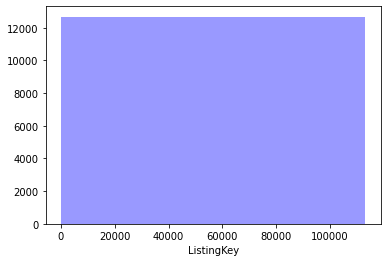

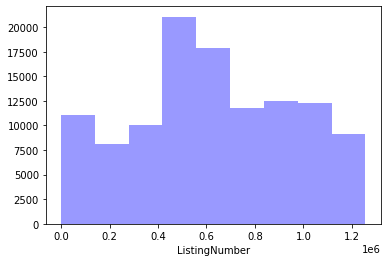

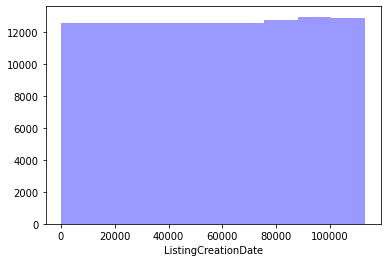

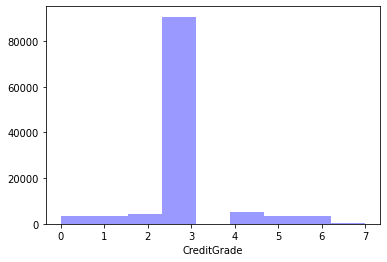

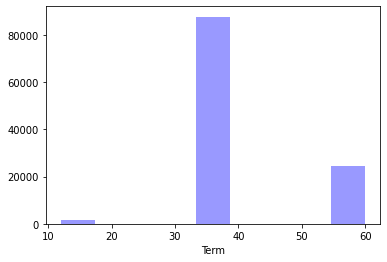

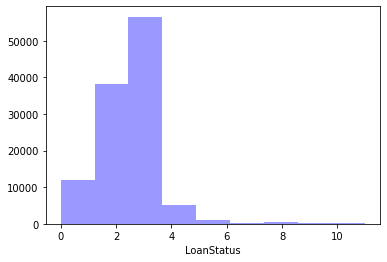

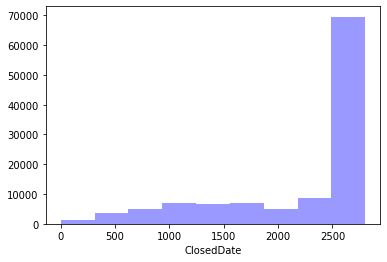

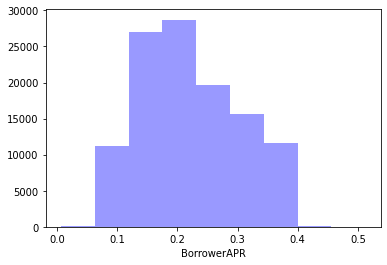

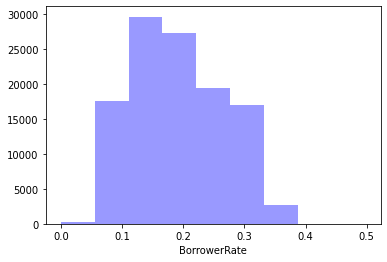

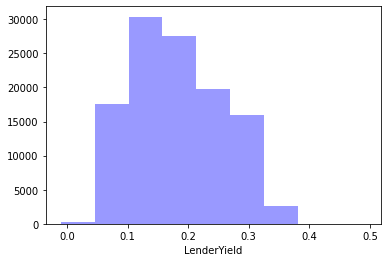

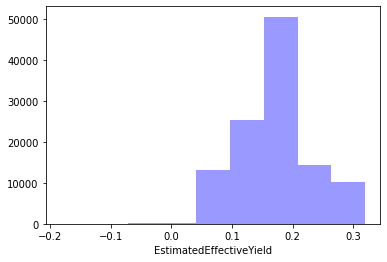

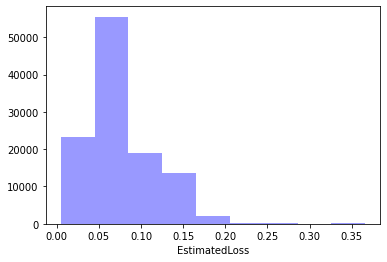

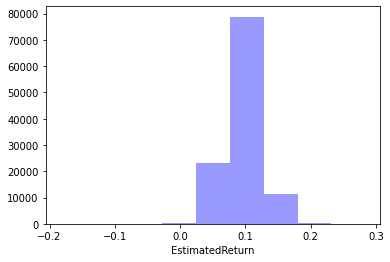

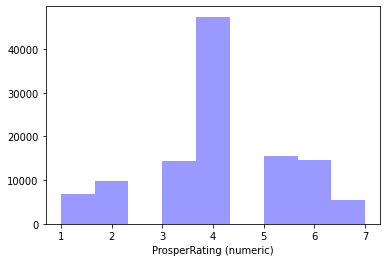

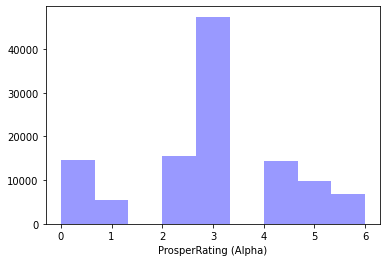

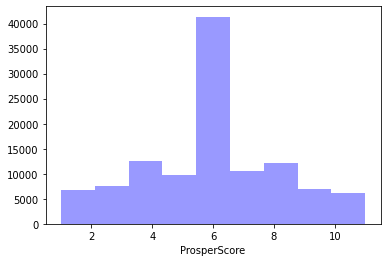

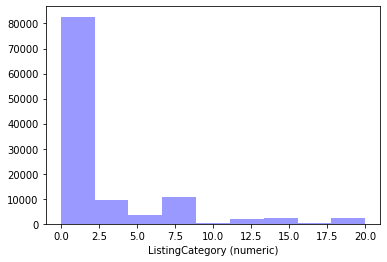

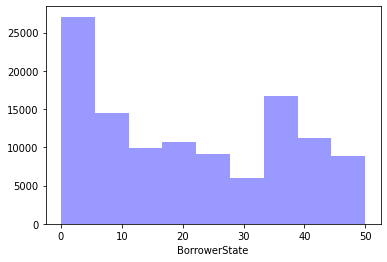

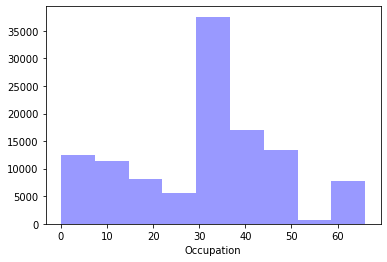

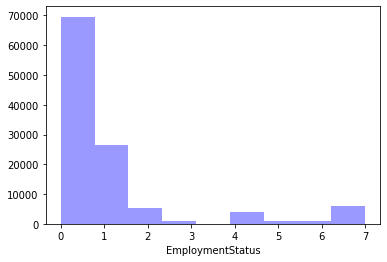

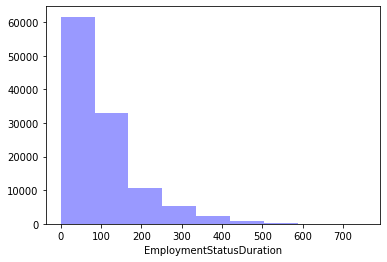

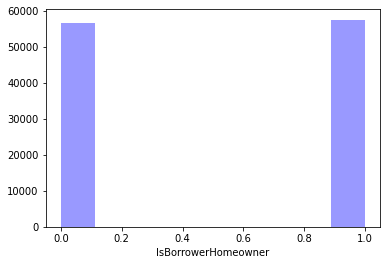

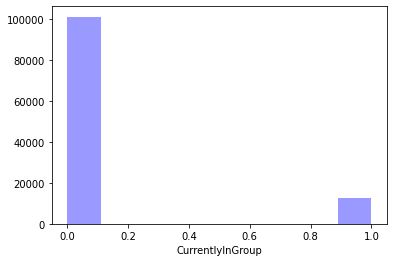

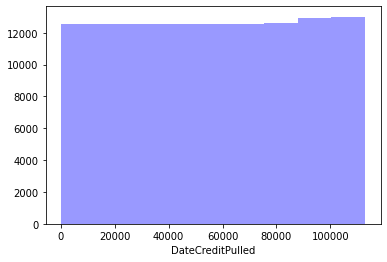

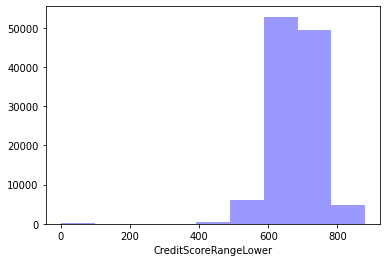

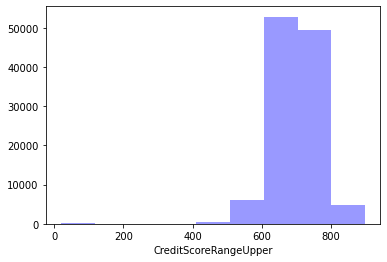

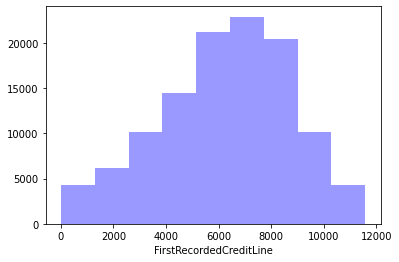

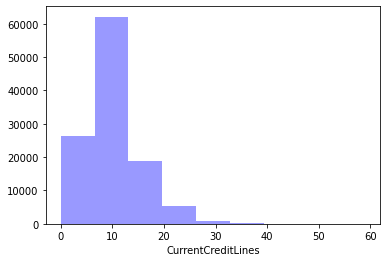

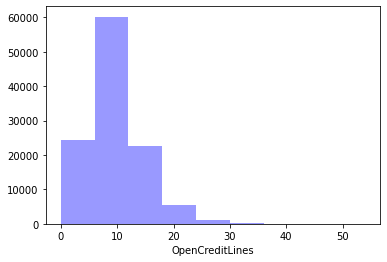

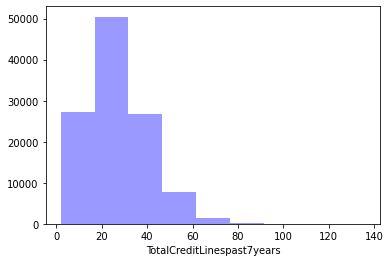

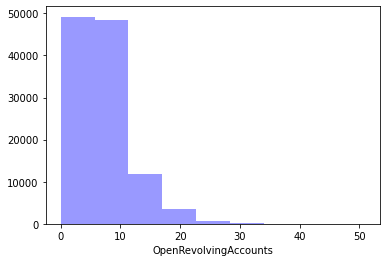

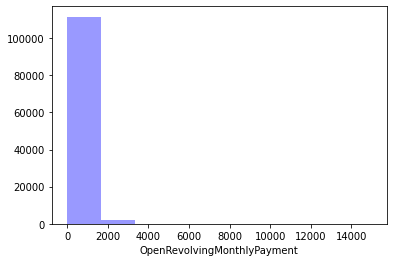

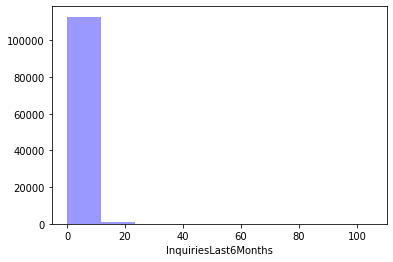

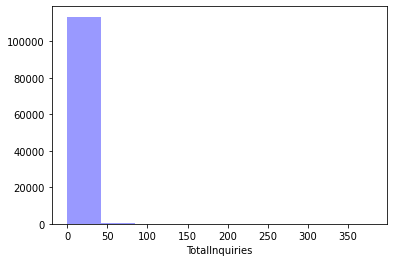

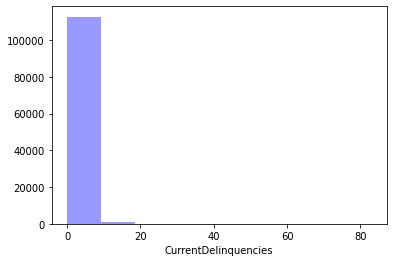

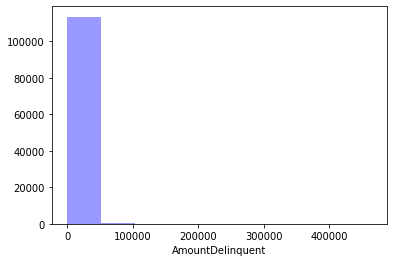

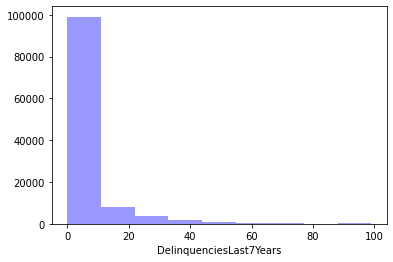

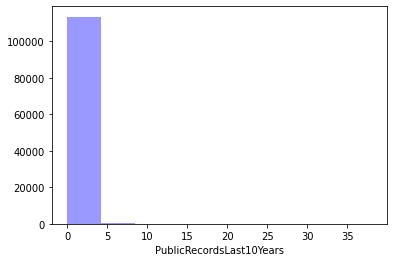

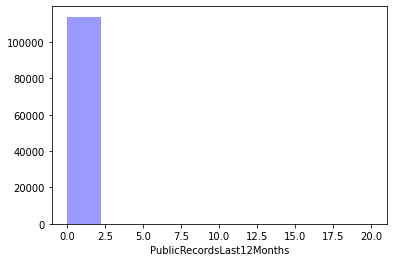

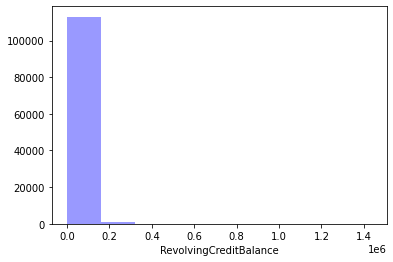

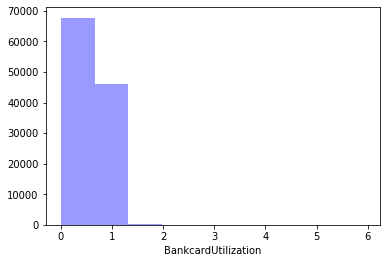

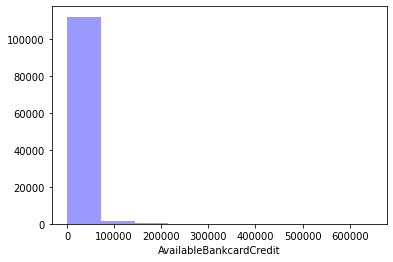

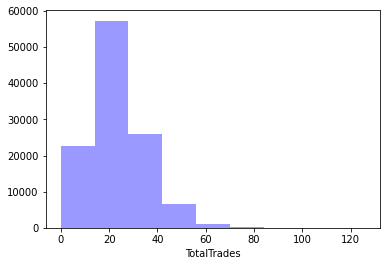

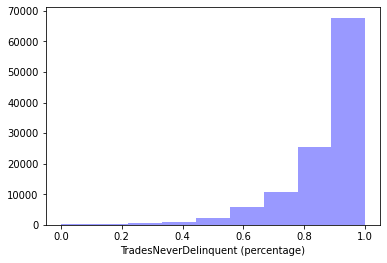

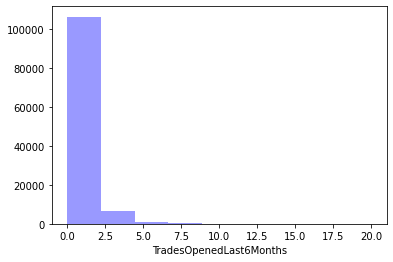

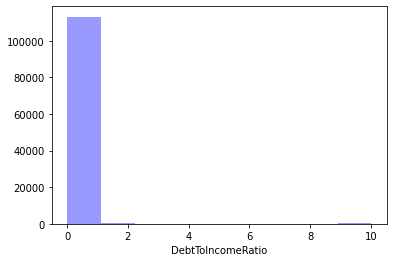

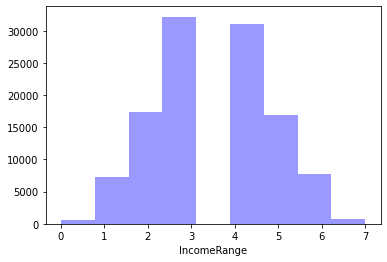

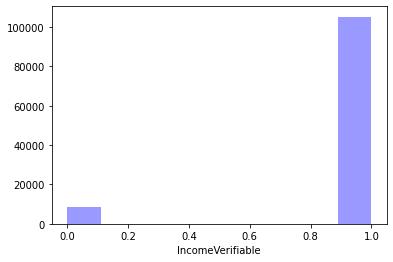

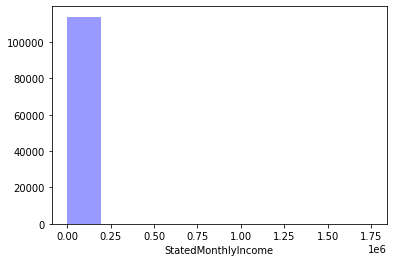

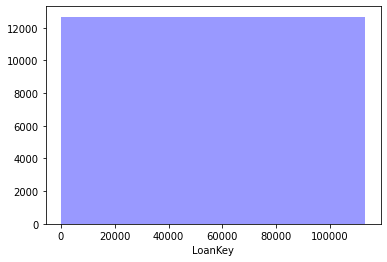

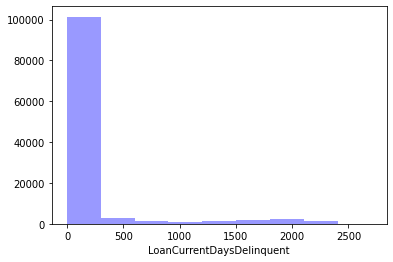

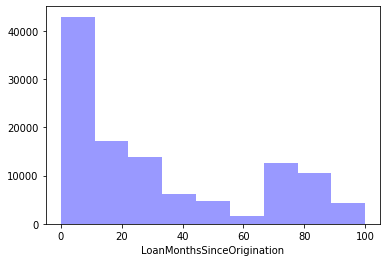

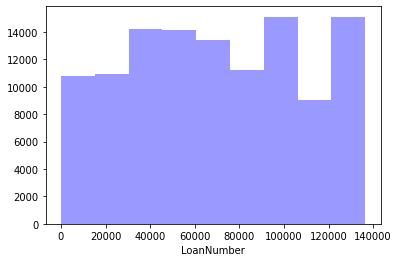

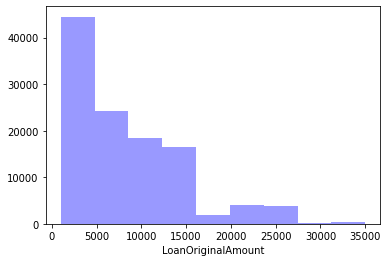

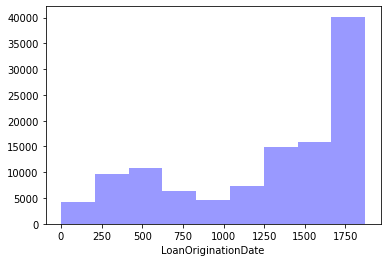

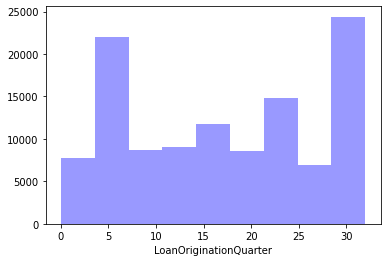

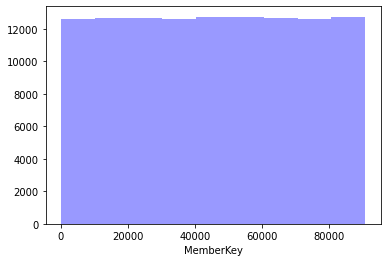

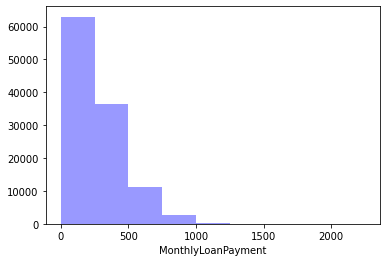

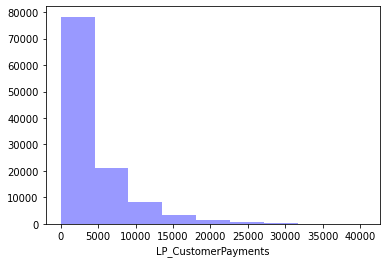

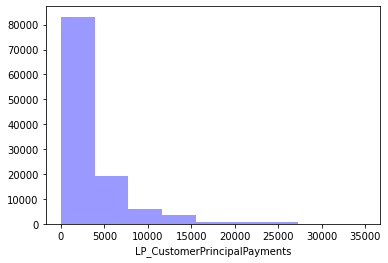

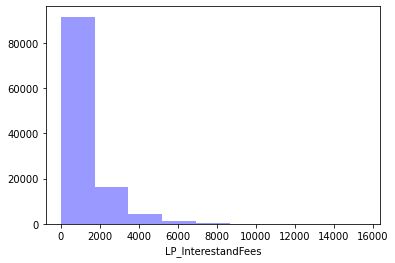

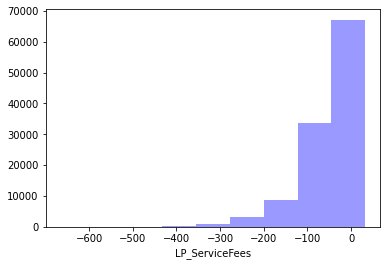

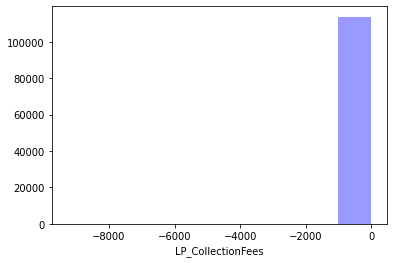

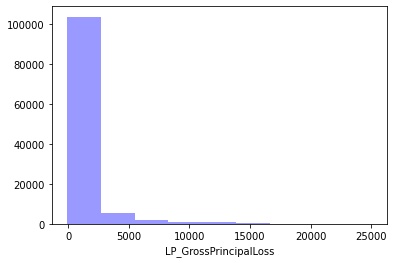

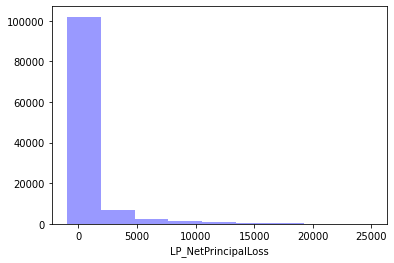

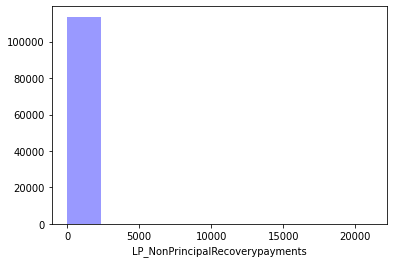

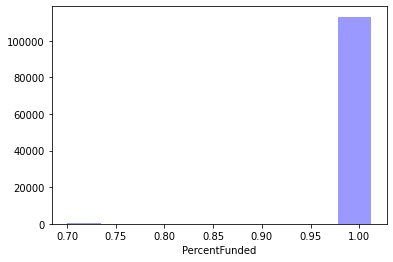

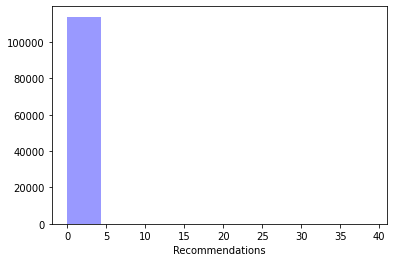

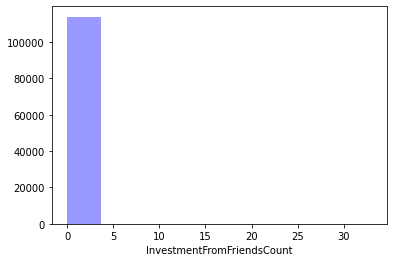

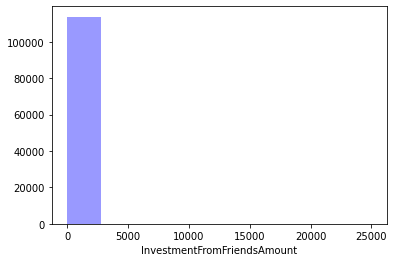

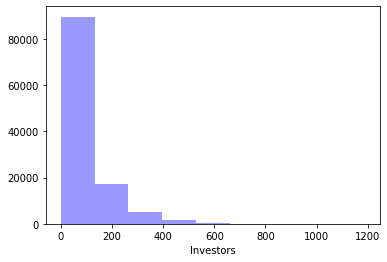

In [40]:
# distribution 
c =df.columns
for i in c:
 sns.distplot(df[i], hist=True ,kde=False,bins=9,color='blue')
 plt.show()
 

<ipython-input-41-5d79b9585c4b>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


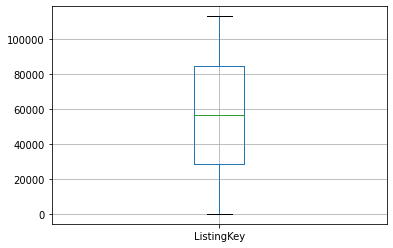

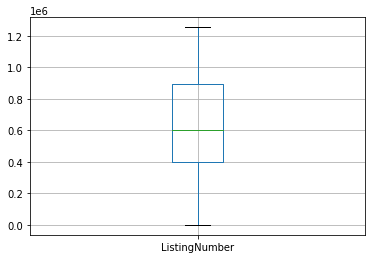

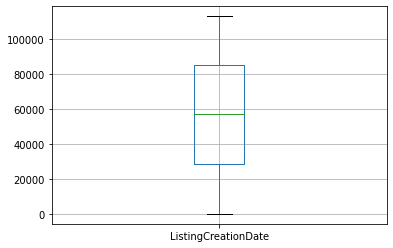

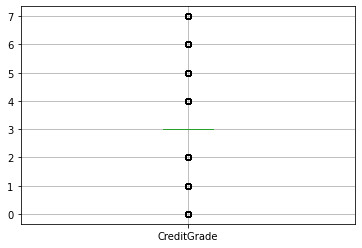

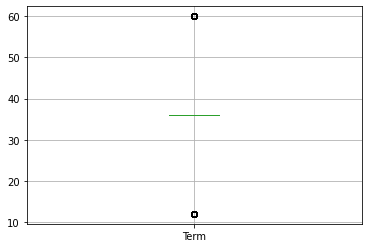

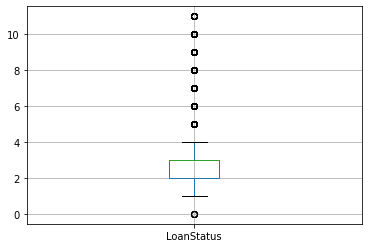

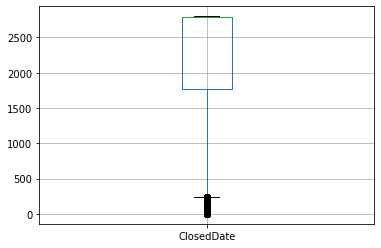

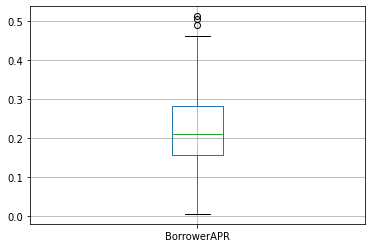

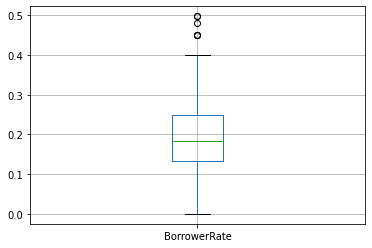

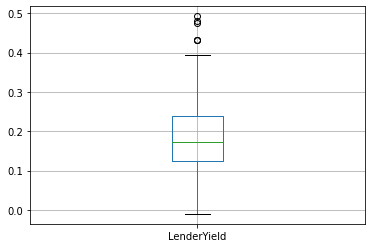

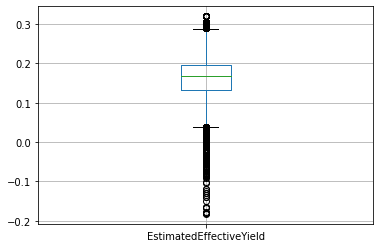

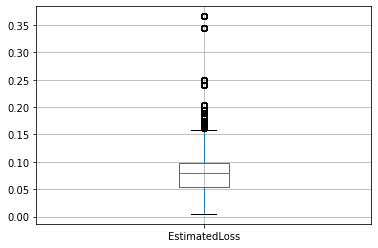

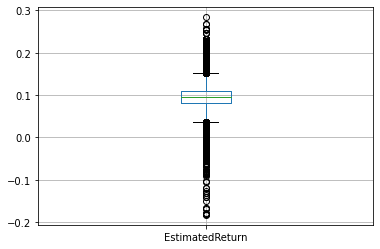

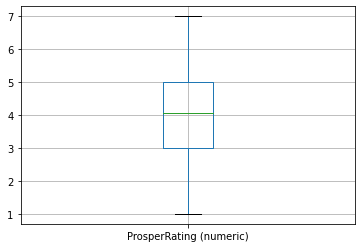

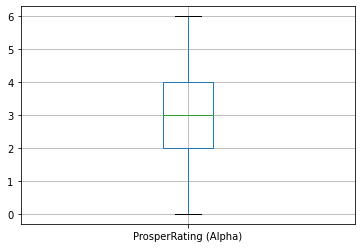

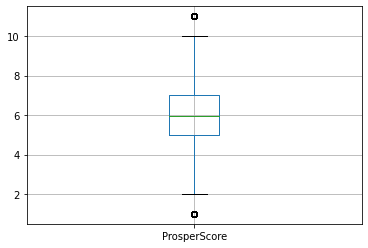

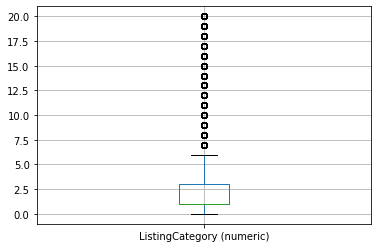

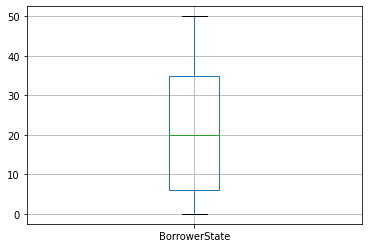

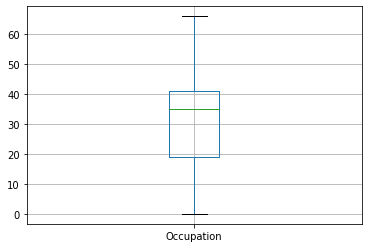

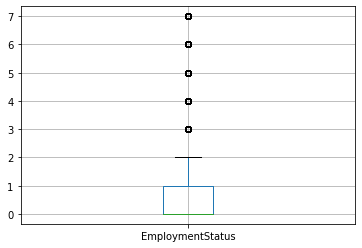

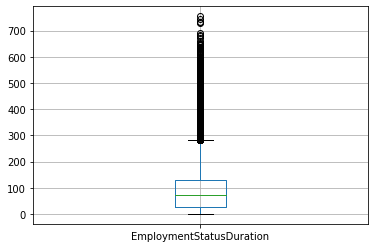

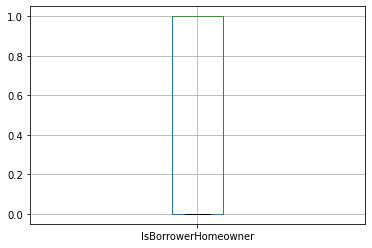

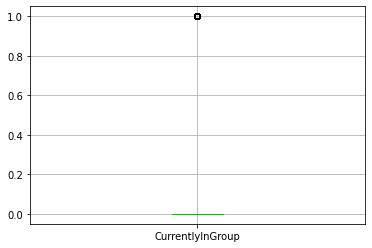

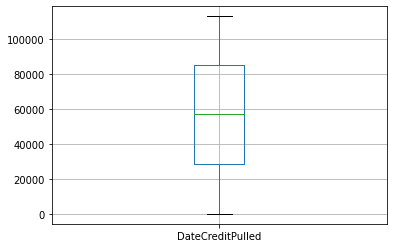

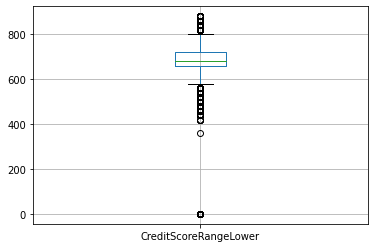

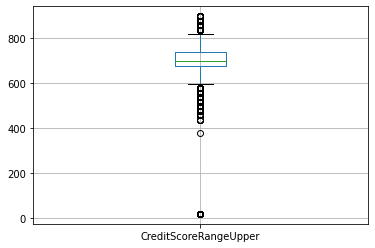

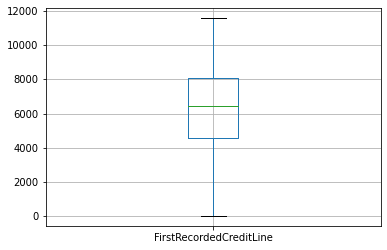

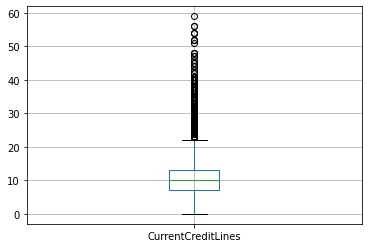

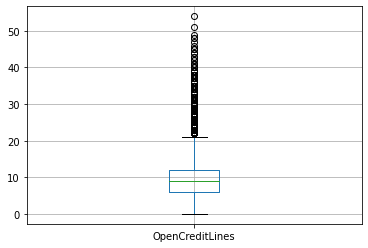

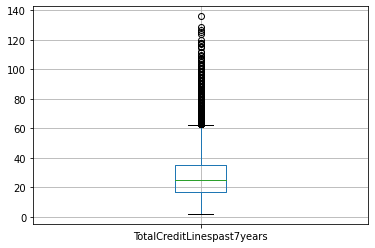

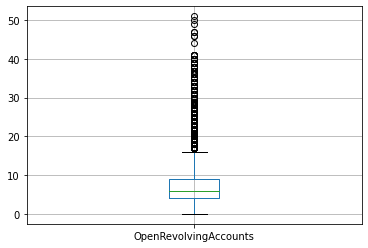

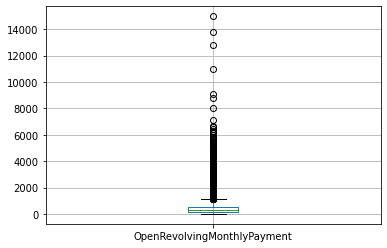

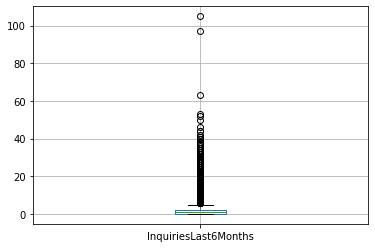

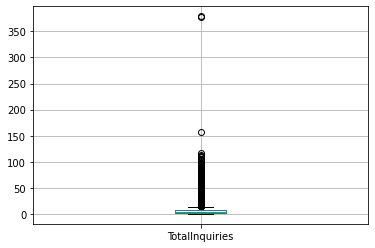

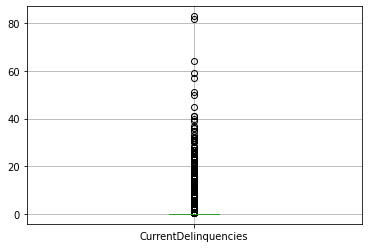

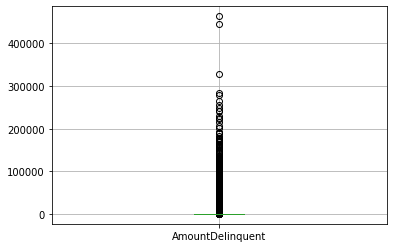

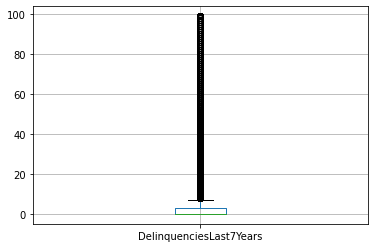

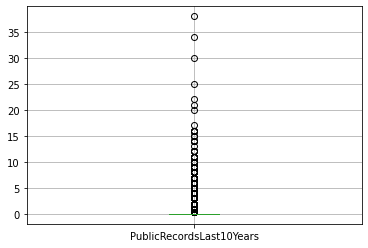

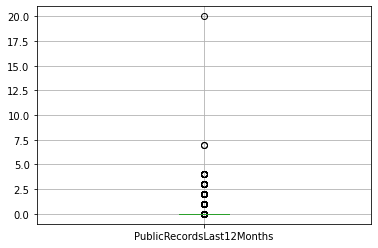

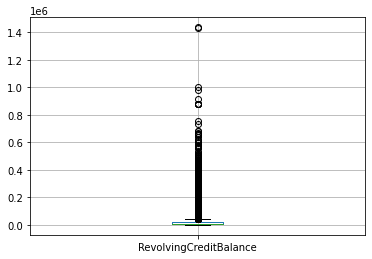

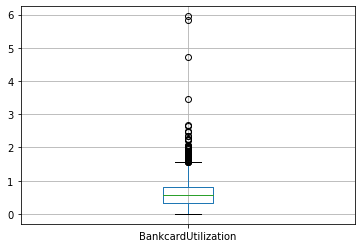

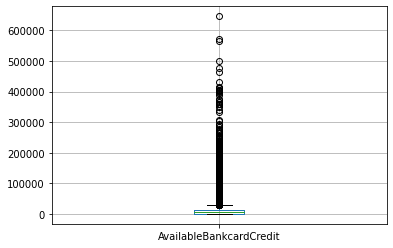

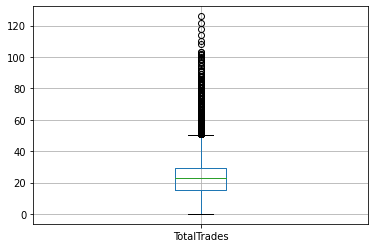

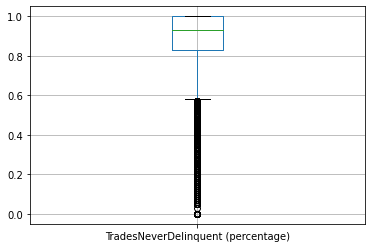

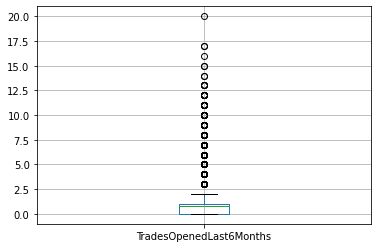

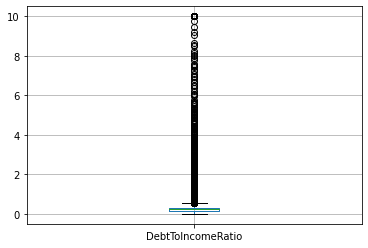

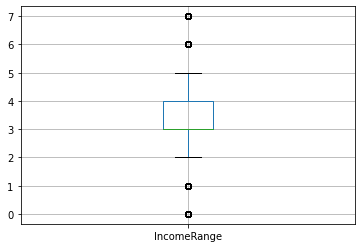

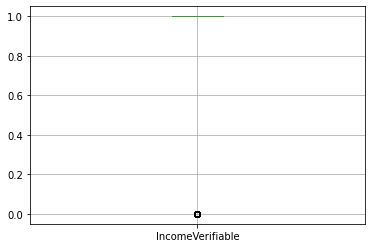

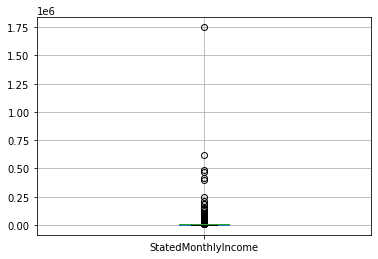

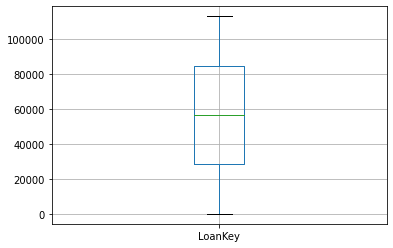

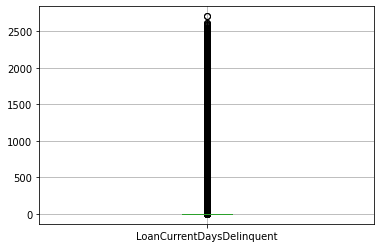

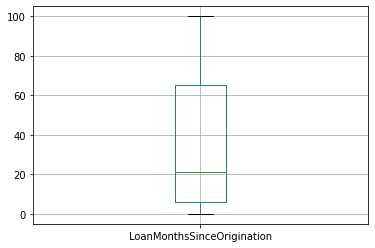

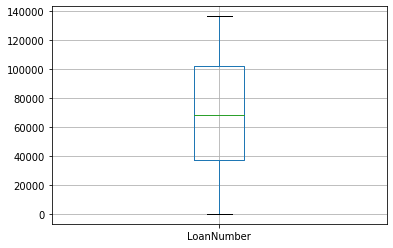

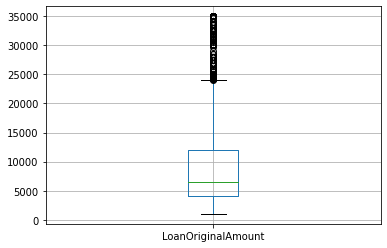

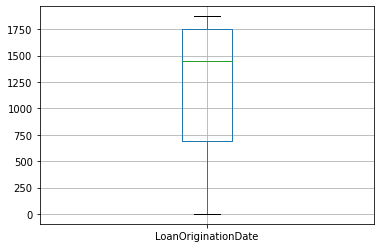

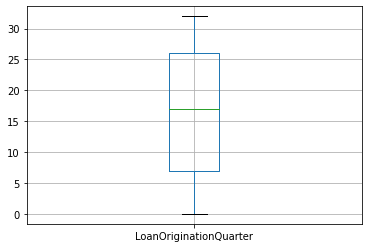

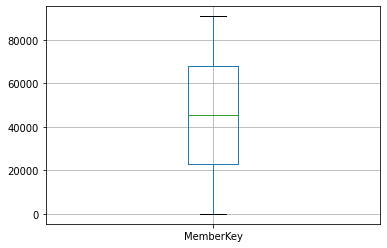

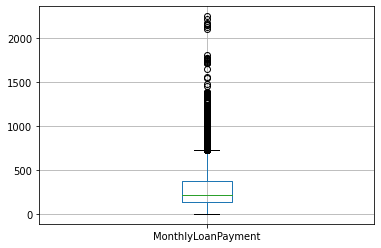

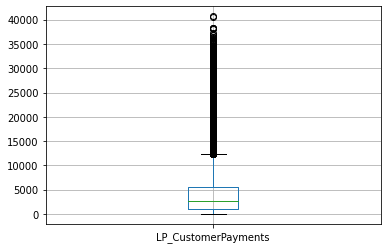

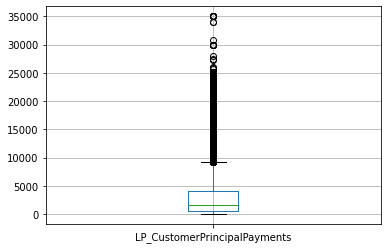

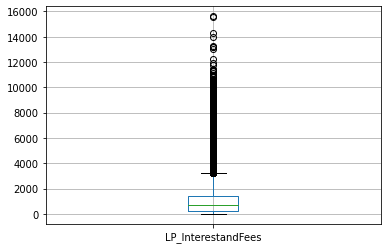

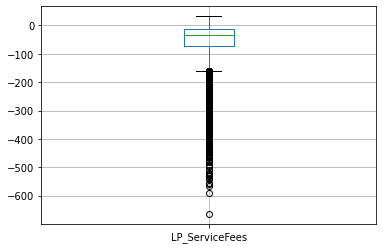

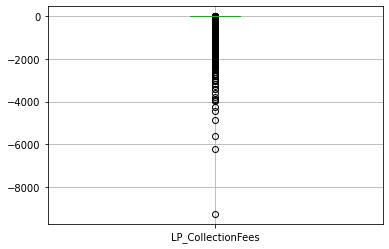

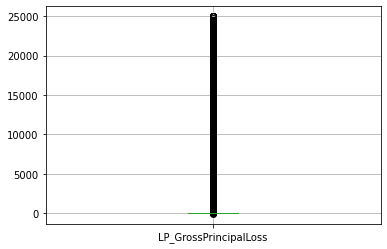

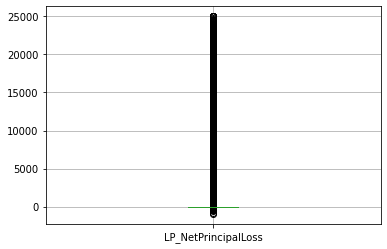

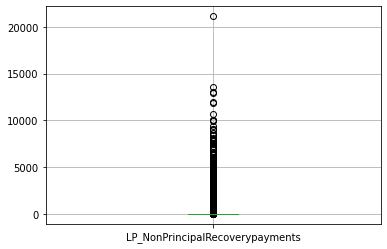

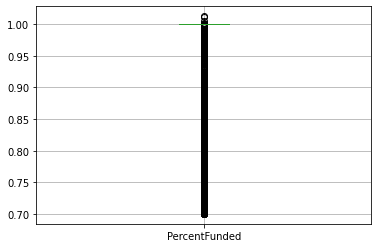

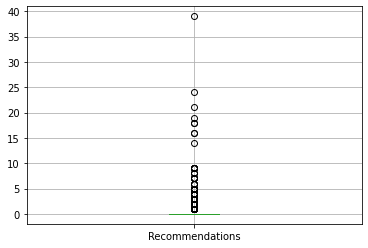

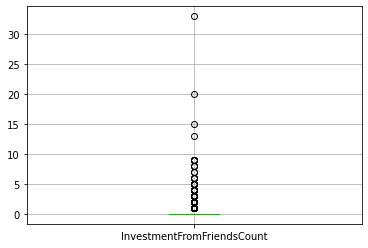

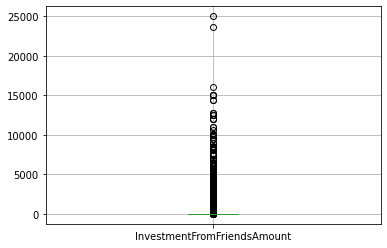

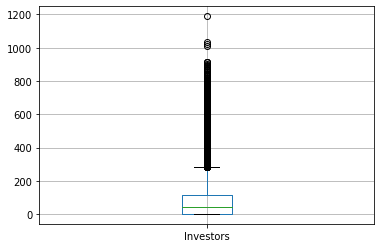

In [41]:
# finding outliers
for i in df:
  plt.figure()
  df.boxplot([i])

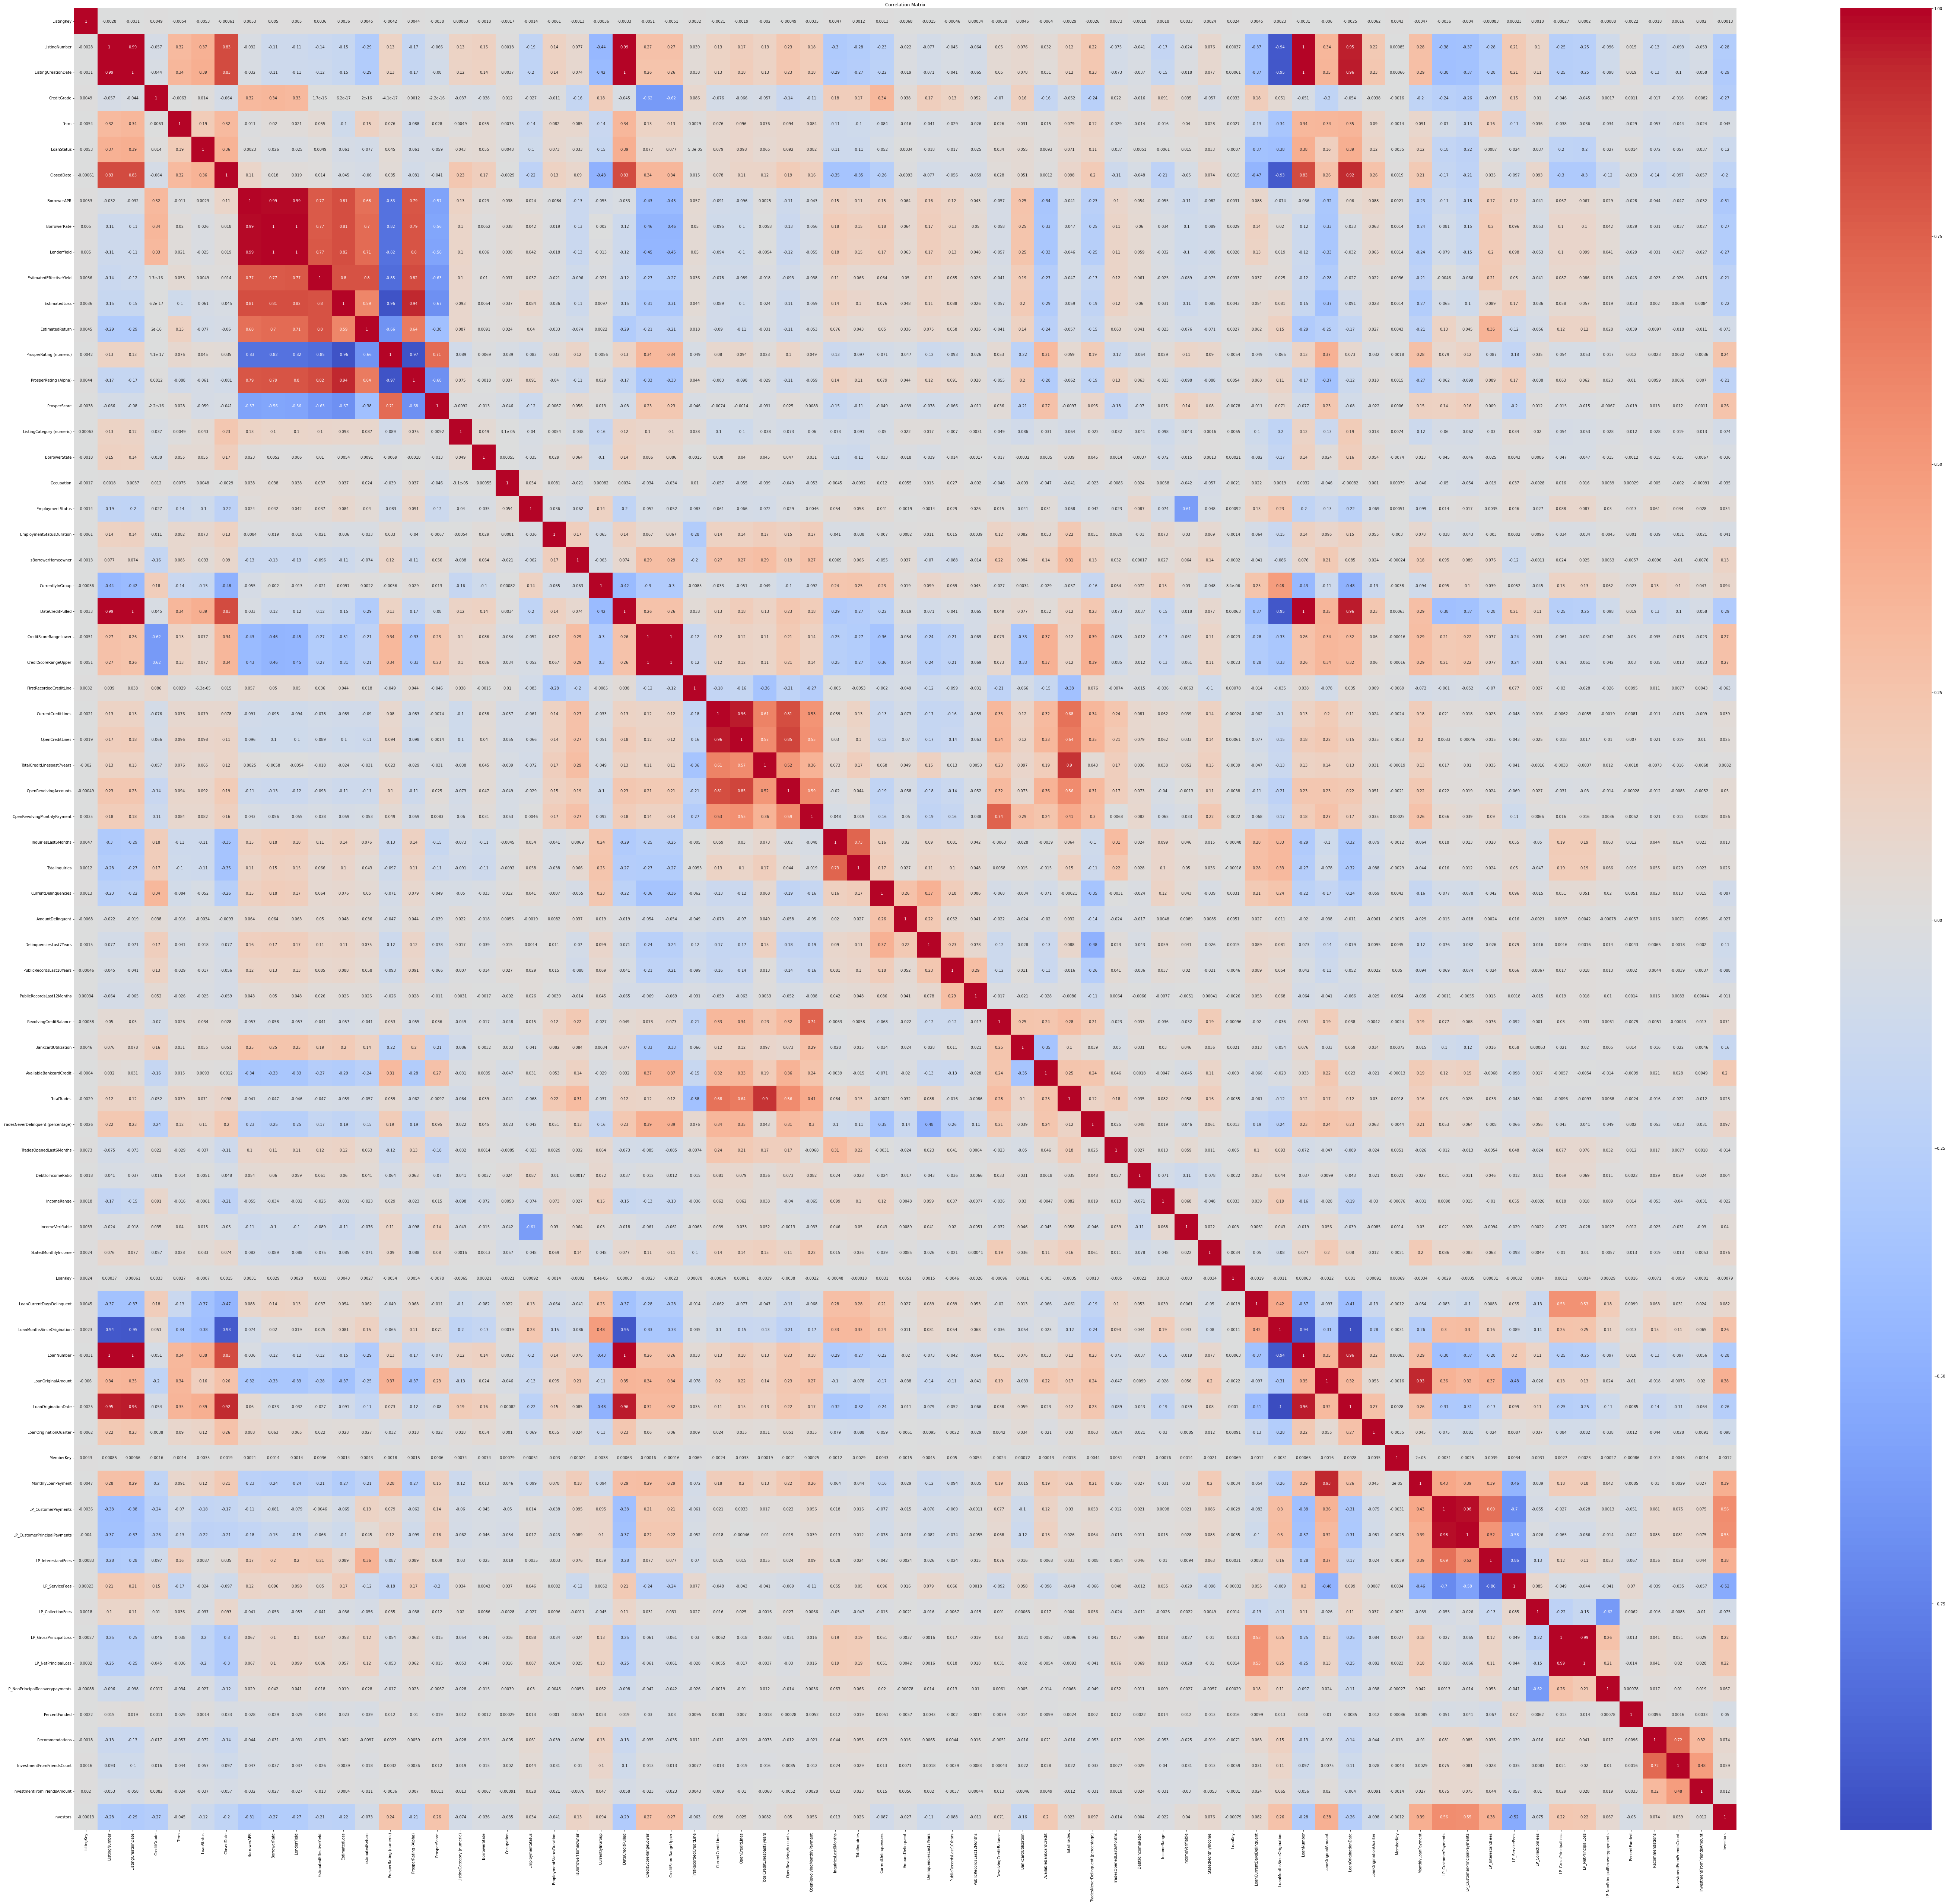

In [42]:
# Heatmap of correlation matrix
plt.figure(figsize=(100,90))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='CreditGrade', ylabel='count'>

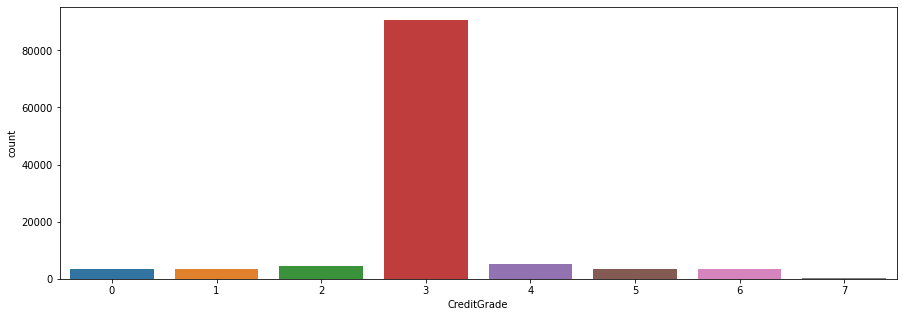

In [43]:
# Check the univariate relationship of Credit Grade# Check the univariate relationship of Credit Grade
plt.figure(figsize=(15,5))
sns.countplot(x='CreditGrade', data=df)

In [44]:
# Check the univariate relationship of Loan Status
plt.figure(figsize=(15,5))
freq_table = df["LoanStatus"].value_counts()
print(freq_table)

3     56576
2     38074
1     11992
4      5018
6       806
8       363
9       313
10      304
7       265
5       205
11       16
0         5
Name: LoanStatus, dtype: int64


<Figure size 1080x360 with 0 Axes>

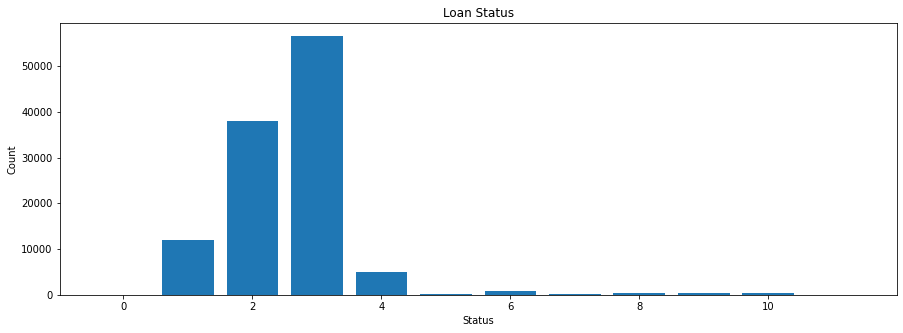

In [45]:
# Create a bar chart of Loan Status
plt.figure(figsize=(15,5))
plt.bar(freq_table.index, freq_table.values)
plt.title("Loan Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='LoanOriginalAmount', ylabel='BorrowerRate'>

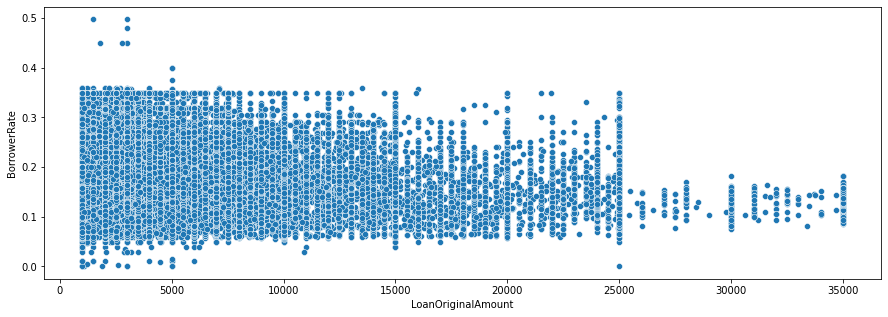

In [46]:
# Visualize the relationship between borrower rate and loan amount
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='LoanOriginalAmount', y='BorrowerRate')

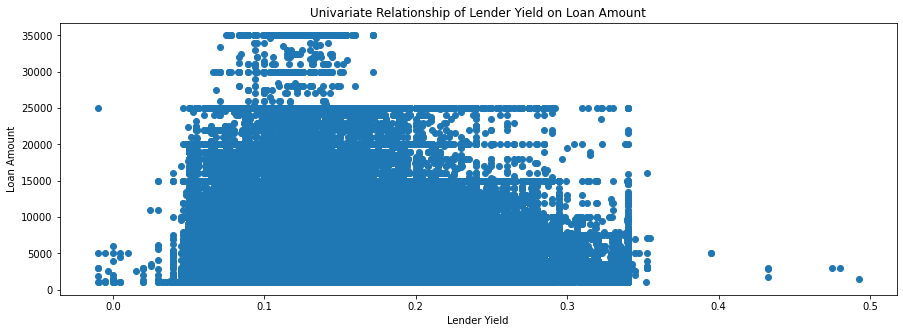

In [47]:
# Create a scatter plot of Lender Yield vs Loan Amount
plt.figure(figsize=(15,5))
plt.scatter(df['LenderYield'], df['LoanOriginalAmount'])
plt.xlabel('Lender Yield')
plt.ylabel('Loan Amount')
plt.title('Univariate Relationship of Lender Yield on Loan Amount')
plt.show()

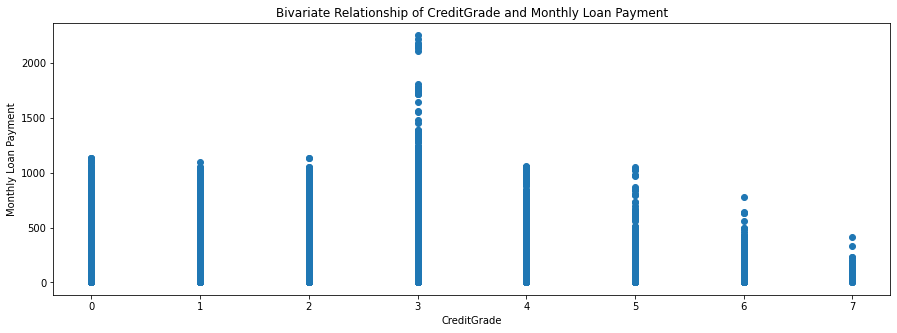

In [48]:
# Create a scatter plot of CreditGrade vs MonthlyLoanPayment
plt.figure(figsize=(15,5))
plt.scatter(df['CreditGrade'],df['MonthlyLoanPayment'])
plt.xlabel('CreditGrade')
plt.ylabel('Monthly Loan Payment')
plt.title('Bivariate Relationship of CreditGrade and Monthly Loan Payment')
plt.show()

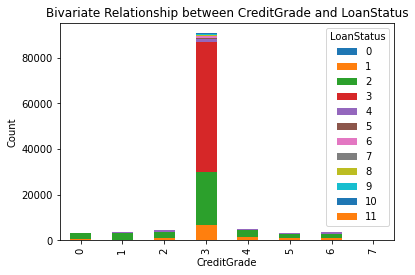

In [49]:
# Create a contingency table of CreditGrade vs. LoanStatus
ctable = pd.crosstab(df['CreditGrade'], df['LoanStatus'])
# Create a stacked bar chart of CreditGrade vs LoanStatus
ctable.plot(kind='bar', stacked=True)
plt.xlabel('CreditGrade')
plt.ylabel('Count')
plt.title('Bivariate Relationship between CreditGrade and LoanStatus')
plt.show()

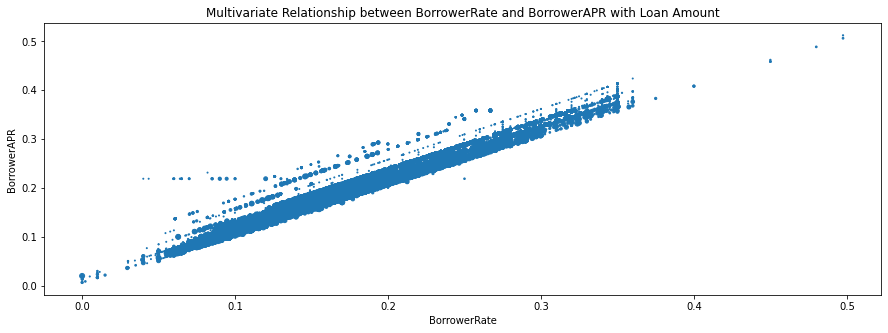

In [50]:
# Create a scatter plot of BorrowerRate vs BorrowerAPR with LoanOriginalAmount represented by marker size
plt.figure(figsize=(15,5))
plt.scatter(df['BorrowerRate'], df['BorrowerAPR'], s=df['LoanOriginalAmount']/1000)
plt.xlabel('BorrowerRate')
plt.ylabel('BorrowerAPR')
plt.title('Multivariate Relationship between BorrowerRate and BorrowerAPR with Loan Amount')
plt.show()